# Text Classification Exercises

## Exercise 1: Dataset Exploration

**Objective**: Familiarize yourself with the dataset.

1. Load the **News Category Dataset** (News_Category_Dataset_v3.json), which contains approximately 210,000 news headlines from 2012 to 2022. **Hint: read the file with Python, parse it with the json library and convert it to a pandas DataFrame.** **Note: you need to extract the file from the zip archive before loading it.**
2. Identify the target label.
3. Which features do you find relevant for the classification task?
4. Perform exploratory data analysis (EDA):
   - Check for any missing values.
   - Visualize the distribution of categories.


In [43]:
import json

import matplotlib.pyplot as plt
import pandas as pd
from nltk import WordNetLemmatizer

with open('../../data/News_Category_Dataset_v3.json', 'r') as f:
    data = f.read()
data_json =  [json.loads(line) for line in data.split('\n') if line][:1000]
df = pd.DataFrame(data_json)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [44]:
top10 = df['category'].value_counts().nlargest(10)
top10 = top10.index
df_i = df[df['category'].isin(top10)]

In [45]:
df_i.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22


## Exercise 2: Text Preprocessing

**Objective**: Prepare the text data for classification tasks.

1. Preprocess the "headline" and "short_description" fields by performing the following steps:
   - Convert all text to lowercase.
   - Remove punctuation, digits, and any other irrelevant characters.
   - Remove stop words.
   - Apply either stemming or lemmatization.
2. Observe how the data changes at each step of preprocessing.
3. Create a new column that concatenates the processed "headline" and "short_description" fields.

In [46]:
import re 
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

def process_text(text):
    text = text.lower()
    text = re.sub(r'https\S+', ' ',text)
    text = re.sub(r"\d"," ",text)
    punct = string.punctuation
    text = text.replace(punct,"")
    text = re.sub(r"\W"," ",text)
    return " ".join(text.split())

def eliminate_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    """for word in words:
        if word in stop_words:
            words.remove(word) OU"""
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

def apply_stemming(text):
    stemmer = PorterStemmer()
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

def process_and_clean(text):
    text = process_text(text)
    text = eliminate_stop_words(text)
    text = apply_stemming(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
print(df_i.iloc[0]['headline'])
iter1 = process_text(df_i.iloc[0]['headline'])
iter1

Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters


'over million americans roll up sleeves for omicron targeted covid boosters'

In [48]:
iter2 = eliminate_stop_words(iter1)
iter2

'million americans roll sleeves omicron targeted covid boosters'

In [49]:
iter3 = apply_stemming(iter2)
iter3

'million american roll sleev omicron target covid booster'

In [50]:
iter4 = apply_lemmatization(iter2)
iter4

'million american roll sleeve omicron targeted covid booster'

In [51]:
df_i['text'] = df_i['headline'] + df_i['short_description']

C:\Users\Francisco\AppData\Local\Temp\ipykernel_14828\1535403598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['text'] = df_i['headline'] + df_i['short_description']


In [52]:
df_i.head()

,link,headline,category,short_description,authors,date,text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22,Cleaner Was Dead In Belk Bathroom For 4 Days B...


In [53]:
df_i['preprocessed_text'] = df_i['text'].apply(process_and_clean)
df_i = df_i[['preprocessed_text','category']]


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14828\3291518897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['preprocessed_text'] = df_i['text'].apply(process_and_clean)


## Exercise 3: Data Splitting

**Objective**: Split the dataset into training and testing sets.

1. Divide the data into **training** and **testing** sets.
   - Use an appropriate train-test split ratio (e.g., 80-20 or 70-30).
   - Ensure the split is **stratified** to maintain the distribution of categories.
   

In [54]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_i,test_size=0.2,random_state=42,stratify=df_i['category'])
train.shape , test.shape

((728, 2), (182, 2))

In [55]:
x_train = train['preprocessed_text']
y_train = train['category']
x_test = test['preprocessed_text']
y_test = test['category']    

## Exercise 4: Feature Extraction

**Objective**: Convert the text data into numerical features.

1. Apply one of the following feature extraction techniques:
   - **Bag-of-Words (BoW)**
   - **TF-IDF**
   - Optionally, apply N-grams (unigrams, bigrams, etc.) before feature extraction.
2. Use either the **sklearn** or **nltk** packages for feature extraction.

In [56]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorize = CountVectorizer(max_features=500)
x_train_bow = vectorize.fit_transform(x_train) 
x_test_bow = vectorize.transform(x_test)


In [57]:
x_train 

811    suprem court reviv fight paint stolen nazisth ...
982    batman still cross million batman still go str...
386    punk band respond former oath keeper wear shir...
730    lawyer roe call overturn law giant step backwa...
876    ohio fairground turn upcom trump polit rallyth...
                             ...                        
227    salman rushdi road recoveri agent saysth autho...
45     meet alex aster tiktok chang publish industri ...
369    school board member say black princip activ go...
419    rock legend carlo santana collaps stageaudi me...
86     michigan suprem court reviv abort right amend ...
Name: preprocessed_text, Length: 728, dtype: object

## Exercise 5: Clustering

**Objective**: Cluster news articles based on their content.

1. Apply KMeans clustering to group news articles into 42 clusters.
2. Visualize the clusters using PCA or t-SNE.

In [58]:
from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k, random_state=42).fit(x_train_bow)


In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train_bow)
X_reduced = pca.fit_transform(x_train_bow)

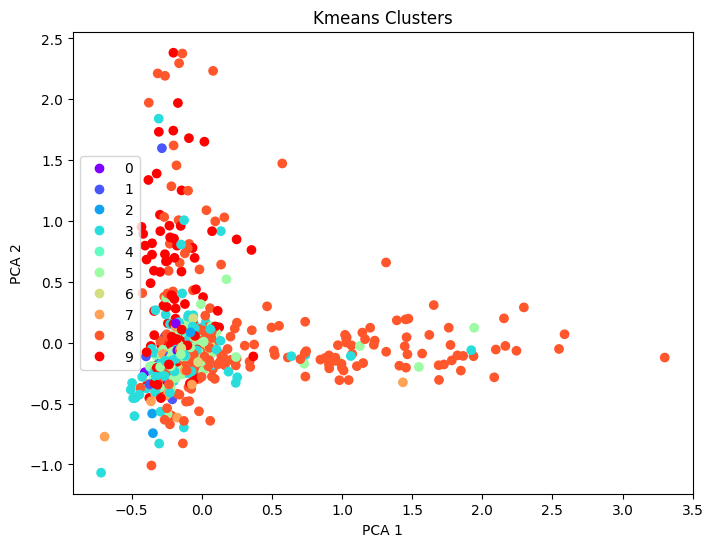

In [60]:
color_map = {cat : i for i, cat in enumerate(set(y_train))}
colors = y_train.map(color_map)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_reduced[:,0],X_reduced[:,1],c=colors,cmap = 'rainbow',
                      label=y_train)
plt.title('Kmeans Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(*scatter.legend_elements(), loc='center left')



## Exercise 6: Model Training

**Objective**: Train machine learning models for text classification.

1. Train various machine learning models on the preprocessed and vectorized data.
   - Choose models from the **sklearn** library (e.g., Logistic Regression, Random Forest, SVM).
   

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42).fit(x_train_bow, y_train)

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred_lr = rf.predict(x_test_bow)
acc = accuracy_score(y_test,y_pred_lr)
precision = precision_score(y_test,y_pred_lr,average='weighted')
recall = recall_score(y_test,y_pred_lr, average='weighted')
f1 = f1_score(y_test,y_pred_lr,average='weighted')

acc,precision,recall,f1

C:\Users\Francisco\miniconda3\envs\tac-hands-on\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.5989010989010989,
 np.float64(0.5993394798403743),
 np.float64(0.5989010989010989),
 np.float64(0.5828366098898841))

In [66]:
from sklearn.metrics import classification_report
import pprint
pprint.pp(classification_report(y_test,y_pred_lr,target_names=set(y_train)))

('                precision    recall  f1-score   support\n'
 '\n'
 '      WELLNESS       1.00      0.20      0.33         5\n'
 '   ENVIRONMENT       0.00      0.00      0.00         5\n'
 'CULTURE & ARTS       0.60      0.70      0.65        37\n'
 '     U.S. NEWS       0.00      0.00      0.00         5\n'
 '     PARENTING       0.40      0.67      0.50         3\n'
 ' ENTERTAINMENT       0.75      0.72      0.74        54\n'
 '        SPORTS       1.00      0.43      0.60         7\n'
 '         CRIME       0.42      0.60      0.49        35\n'
 '      POLITICS       0.00      0.00      0.00         3\n'
 '    WORLD NEWS       0.65      0.61      0.63        28\n'
 '\n'
 '      accuracy                           0.60       182\n'
 '     macro avg       0.48      0.39      0.39       182\n'
 '  weighted avg       0.60      0.60      0.58       182\n')


C:\Users\Francisco\miniconda3\envs\tac-hands-on\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\miniconda3\envs\tac-hands-on\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\miniconda3\envs\tac-hands-on\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

## Exercise 7: Model Evaluation

**Objective**: Evaluate the performance of the trained models.

1. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.
2. Perform **cross-validation** on at least one model to ensure reliable performance evaluation.
